In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [22]:
os.chdir("/home/siti/Downloads/New NHS Data")

In [23]:
df = pd.read_csv("AE_Synthetic_Data_Final_V02.csv")

In [24]:
print(df["LOS_Category"].value_counts())

Short stay    11942983
Long stay       779233
Name: LOS_Category, dtype: int64


In [25]:
# Convert object types to category
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [45]:
df2 = pd.read_csv("AE_Synthetic_Data_clean.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12722216 entries, 0 to 12722215
Data columns (total 23 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   IMD_Decile_From_LSOA             float64
 1   Age_Band                         object 
 2   Sex                              object 
 3   AE_Arrive_Date                   object 
 4   AE_Arrive_HourOfDay              object 
 5   AE_Time_Mins                     int64  
 6   AE_HRG                           object 
 7   AE_Num_Diagnoses                 int64  
 8   AE_Num_Investigations            int64  
 9   AE_Num_Treatments                int64  
 10  AE_Arrival_Mode                  object 
 11  Provider_Patient_Distance_Miles  float64
 12  ProvID                           int64  
 13  Admitted_Flag                    float64
 14  Admission_Method                 object 
 15  ICD10_Chapter_Code               object 
 16  TFC                              object 
 17  Length

# Dependent Variable 

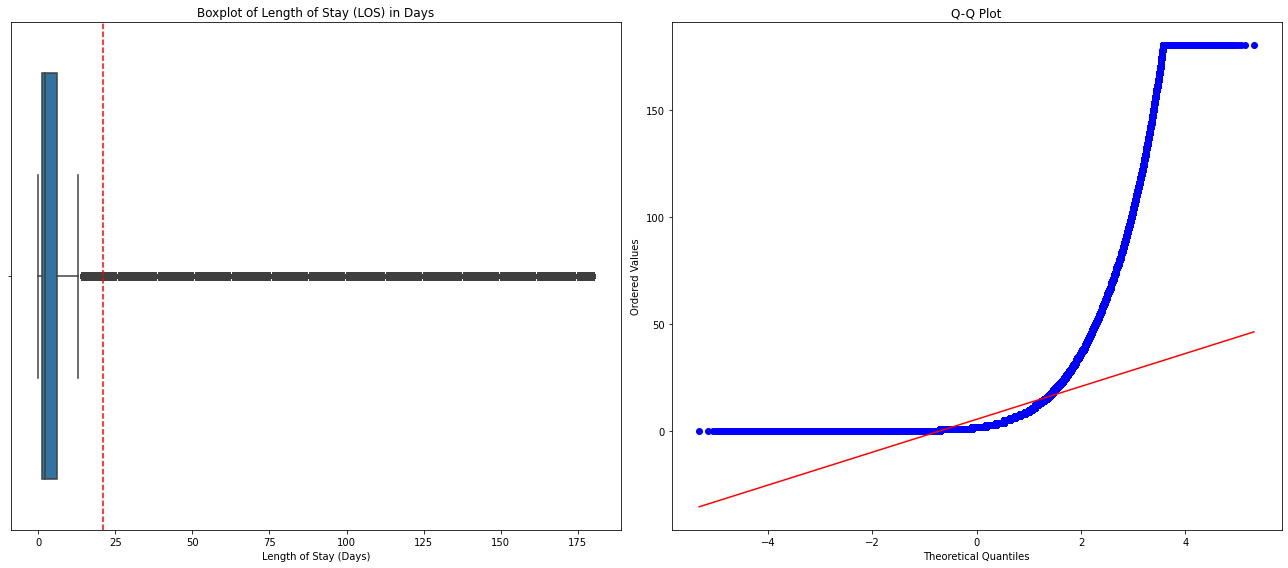

In [58]:
# Create a 1x2 grid for the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Boxplot
sns.boxplot(x='Length_Of_Stay_Days', data=df2, ax=axes[0])
axes[0].axvline(21, color='r', linestyle='--')
axes[0].set_title("Boxplot of Length of Stay (LOS) in Days")
axes[0].set_xlabel('Length of Stay (Days)')

# QQ Plot
stats.probplot(df2['Length_Of_Stay_Days'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')

# Show the plots
plt.tight_layout()
plt.savefig("LOS_summary.png")
plt.show()

In [59]:

# Getting the values
osm, osr = stats.probplot(df2['Length_Of_Stay_Days'], dist="norm")


In [60]:
osm


(array([-5.31109849, -5.1471329 , -5.05889035, ...,  5.05889035,
         5.1471329 ,  5.31109849]),
 array([  0.,   0.,   0., ..., 180., 180., 180.]))

In [ ]:
plt.figure(figsize=(12, 8))  # Set the figure size
sns.boxplot(x='Age_Band', y='Length_Of_Stay_Days', data=df)  # Create the boxplot
plt.axhline(21, color='r', linestyle='--')  # Add a horizontal line at LOS = 21 days
plt.title("Boxplot of LOS by Age Band")  # Add a title to the plot
plt.xlabel("Age Band")  # Label the x-axis
plt.ylabel("Length of Stay (Days)")  # Label the y-axis
plt.show()  # Display the plot

# Q-Q plot

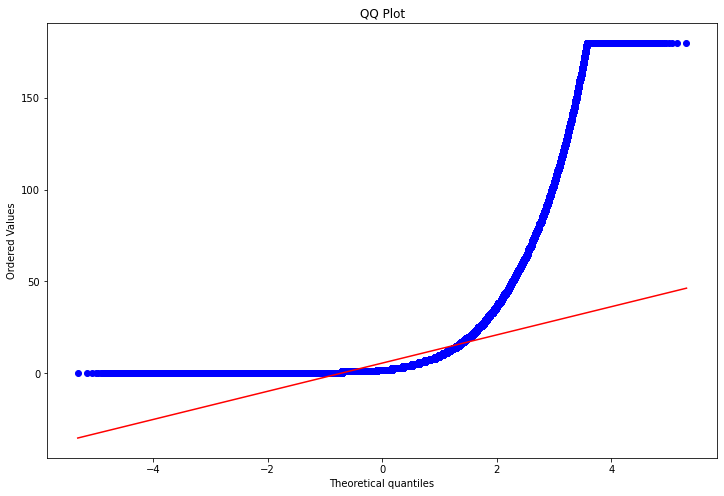

In [54]:
import scipy.stats as stats

# Generate QQ plot
plt.figure(figsize=(12, 8))
stats.probplot(df2['Length_Of_Stay_Days'], dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()


# Log-Transformed Length of Stay

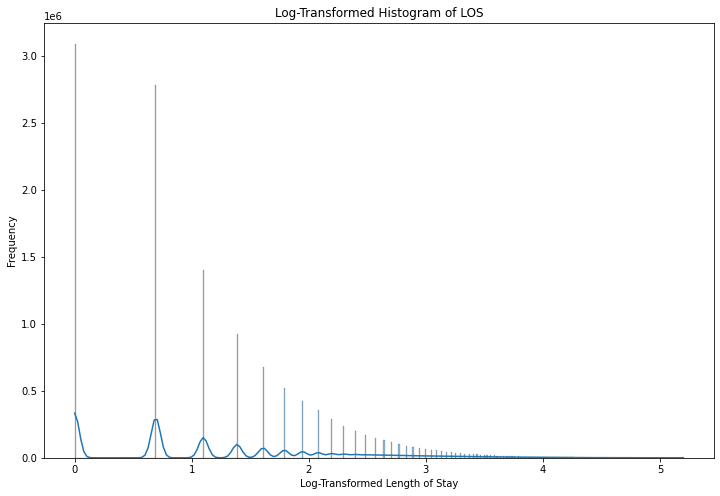

In [53]:
plt.figure(figsize=(12, 8))
sns.histplot(np.log1p(df2['Length_Of_Stay_Days']), kde=True)
plt.title('Log-Transformed Histogram of LOS')
plt.xlabel('Log-Transformed Length of Stay')
plt.ylabel('Frequency')
plt.show()


In [ ]:

# Take a random sample of 500 from each category (change this number as needed)
short_stay_sample = df2[df2['Length_Of_Stay_Days'] < 21].sample(500, random_state=1)
long_stay_sample = df2[df2['Length_Of_Stay_Days'] >= 21].sample(500, random_state=1)

# Combine the two samples into one DataFrame
combined_sample = pd.concat([short_stay_sample, long_stay_sample])

# Create the scatterplot with jitter
plt.figure(figsize=(12, 8))
sns.stripplot(x='Sex', y='Length_Of_Stay_Days', data=combined_sample, jitter=True, alpha=0.6)
plt.axhline(21, color='r', linestyle='--')
plt.title("Scatterplot of LOS by Age Band (Subset)")
plt.show()


In [42]:
def categorize_time_band(band):
    if band in ['05-08', '09-12']:
        return 'Morning'
    elif band in ['13-16', '17-20']:
        return 'Evening'
    else:
        return 'Night'

df2 = df.copy()

df2['AE_Arrive_HourOfDay'] = df2['AE_Arrive_HourOfDay'].apply(categorize_time_band)

df2['AE_Arrive_HourOfDay'].value_counts(normalize=False)

Evening    5826567
Morning    4055370
Night      2840279
Name: AE_Arrive_HourOfDay, dtype: int64

In [43]:
df2['AE_Arrive_HourOfDay'].value_counts(normalize=True)

Evening    0.457984
Morning    0.318763
Night      0.223253
Name: AE_Arrive_HourOfDay, dtype: float64

In [34]:
import pandas as pd
import numpy as np

# Assume df is your DataFrame

# Initialize an empty list to hold the rows for the summary table
summary_table = []

# Loop through each column in the DataFrame
for col in df.columns:
    # Initialize a dictionary to hold summary information for each variable
    summary_info = {}
    
    summary_info['Variable Name'] = col
    
    # Determine variable type and generate summary statistics accordingly
    if df[col].dtype in ['int64', 'float64']:
        summary_info['Variable Type'] = 'Continuous'
        summary_info['Count'] = df[col].count()
        summary_info['Missing Values (%)'] = round((df[col].isna().sum() / df.shape[0]) * 100, 1)
        summary_info['Median'] = np.median(df[col].dropna())  # drop NA values before finding median
        summary_info['IQR'] = np.percentile(df[col].dropna(), 75) - np.percentile(df[col].dropna(), 25)  # IQR
        summary_info['Mode'] = 'N/A'
        summary_info['Categories'] = 'N/A'
        summary_info['Frequency Distribution (%)'] = 'N/A'
        summary_info['Sample Numbers'] = 'N/A'
        
    else:
        summary_info['Variable Type'] = 'Categorical'  # Assuming all other types as categorical for this example
        summary_info['Count'] = df[col].count()
        summary_info['Missing Values (%)'] = round((df[col].isna().sum() / df.shape[0]) * 100, 2)
        summary_info['Mode'] = df[col].mode()[0]
        
        # Collect category names, frequencies, and sample numbers
        value_counts = df[col].value_counts()
        sample_numbers = ", ".join([f"{count}" for count in value_counts])
        frequencies = ", ".join([f"{(count / df.shape[0]) * 100:.2f}%" for count in value_counts])
        
        summary_info['Categories'] = 'N/A'
        summary_info['Frequency Distribution (%)'] = frequencies
        summary_info['Sample Numbers'] = sample_numbers
        summary_info['Median'] = 'N/A'
        summary_info['IQR'] = 'N/A'
        
    # Append the summary information for this variable to the summary table
    summary_table.append(summary_info)

# Convert the summary table to a DataFrame for better display and potential export to CSV
summary_df = pd.DataFrame(summary_table)
print(summary_df.head())


         Variable Name Variable Type     Count  Missing Values (%)  \
0         IMD_Category   Categorical  12722216                 0.0   
1             Age_Band   Categorical  12722216                 0.0   
2                  Sex   Categorical  12722216                 0.0   
3  AE_Arrive_HourOfDay   Categorical  12722216                 0.0   
4         AE_Time_Mins    Continuous  12722216                 0.0   

                Mode Categories  \
0  Most deprived 20%        N/A   
1              65-84        N/A   
2             Female        N/A   
3              09-12        N/A   
4                N/A        N/A   

                      Frequency Distribution (%)  \
0         26.35%, 22.59%, 19.00%, 16.87%, 15.19%   
1  31.46%, 19.56%, 18.43%, 15.37%, 10.00%, 5.17%   
2                                 52.66%, 47.34%   
3  23.40%, 23.39%, 22.41%, 12.02%, 10.31%, 8.47%   
4                                            N/A   

                                      Sample Numbers Me

In [37]:
continuous_vars = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
continuous_vars

['AE_Time_Mins',
 'AE_Num_Diagnoses',
 'AE_Num_Investigations',
 'AE_Num_Treatments']

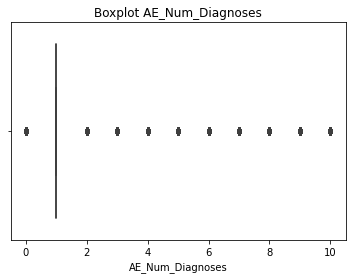

In [40]:
df[continuous_vars].describe()

sns.boxplot(x=df['AE_Num_Diagnoses'])
plt.title('Boxplot AE_Num_Diagnoses')
plt.show()

In [38]:

continuous_table=[]

for col in continuous_vars:
    # Initialize a dictionary to hold summary information for each variable
    summary_info = {}
    
    summary_info['Variable Name'] = col
    
    
    summary_info['Variable Type'] = 'Continuous'
    summary_info['Median'] = np.median(df[col].dropna())  # Drop NA values before finding median
    summary_info['Q1'] = np.percentile(df[col].dropna(), 25)  # 1st Quartile
    summary_info['Q3'] = np.percentile(df[col].dropna(), 75)  # 3rd Quartile
    summary_info['IQR'] = summary_info['Q3'] - summary_info['Q1']  # Interquartile Range
        
    # Append the summary information for this variable to the summary table
    continuous_table.append(summary_info)
    
continuous_df = pd.DataFrame(continuous_table)
print(continuous_df)

           Variable Name Variable Type  Median     Q1     Q3    IQR
0           AE_Time_Mins    Continuous   230.0  180.0  310.0  130.0
1       AE_Num_Diagnoses    Continuous     1.0    1.0    1.0    0.0
2  AE_Num_Investigations    Continuous     5.0    2.0    7.0    5.0
3      AE_Num_Treatments    Continuous     3.0    2.0    5.0    3.0


In [27]:

# Initialize a dictionary to hold the summary information for each categorical variable
summary_dict = {}

# Loop through each column in the DataFrame
for col in df.columns:
    # Check if the column is of object data type or category data type, 
    # assuming that 'object' or 'category' type means categorical
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Initialize a dictionary for each variable to store its categories, sample numbers, and frequencies
        summary_dict[col] = {'Categories': [], 'Sample Numbers': [], 'Frequency Distribution (%)': []}
        
        # Get value counts for the column
        value_counts = df[col].value_counts()
        
        # Total count for the column
        total_count = len(df[col])
        
        for category, sample_number in value_counts.items():
            # Append category to 'Categories'
            summary_dict[col]['Categories'].append(category)
            
            # Append sample number to 'Sample Numbers'
            summary_dict[col]['Sample Numbers'].append(sample_number)
            
            # Calculate and append frequency distribution to 'Frequency Distribution (%)'
            frequency = round((sample_number / total_count) * 100, 2)
            summary_dict[col]['Frequency Distribution (%)'].append(frequency)

# Print the summary information
for var, info in summary_dict.items():
    print(f"Variable: {var}")
    print(f"  Categories: {info['Categories']}")
    print(f"  Sample Numbers: {info['Sample Numbers']}")
    print(f"  Frequency Distribution (%): {info['Frequency Distribution (%)']}")
    print('-' * 40)


Variable: IMD_Category
  Categories: ['Most deprived 20%', '20% - 40%', '40 - 60%', '60% - 80%', 'Least deprived 20%']
  Sample Numbers: [3351764, 2874370, 2417353, 2146062, 1932667]
  Frequency Distribution (%): [26.35, 22.59, 19.0, 16.87, 15.19]
----------------------------------------
Variable: Age_Band
  Categories: ['65-84', '45-64', '85+', '25-44', '01-17', '18-24']
  Sample Numbers: [4002377, 2488102, 2345154, 1955466, 1272851, 658266]
  Frequency Distribution (%): [31.46, 19.56, 18.43, 15.37, 10.0, 5.17]
----------------------------------------
Variable: Sex
  Categories: ['Female', 'Male']
  Sample Numbers: [6699335, 6022881]
  Frequency Distribution (%): [52.66, 47.34]
----------------------------------------
Variable: AE_Arrive_HourOfDay
  Categories: ['09-12', '13-16', '17-20', '21-24', '01-04', '05-08']
  Sample Numbers: [2977169, 2976128, 2850439, 1529065, 1311214, 1078201]
  Frequency Distribution (%): [23.4, 23.39, 22.41, 12.02, 10.31, 8.47]
----------------------------

In [20]:
summary_df.to_csv("Summary_data.csv", index=False)

In [14]:
3351764/12722216

0.2634575611670168